In [146]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import mtist_utils as mu
from mtist import graphing_utils as gu

from glob import glob

%config InlineBackend.figure_format='retina'

plt.rcParams["svg.fonttype"] = "none"
# plt.rcParams.update({"font.family": "Computer Modern"})

rng = np.random.default_rng(11206)

In [147]:
meta_food = (
    pd.read_csv("../mtist1.0/mtist_datasets_food/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

meta_nofood = (
    pd.read_csv("../mtist1.0/mtist_datasets_nofood/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

In [160]:
###########################################################################################################
# Obtain normal ES Scores for 
############################################################################################################


methods = ["default_food", "default_ignore_food", "default_food_arithm", "default_ignore_food_arithm", 
           "ridge_CV_food", "ridge_CV_ignore_food", "ridge_CV_food_arithm", "ridge_CV_ignore_food_arithm"]

# methods = ["default_food_arithm", "default_ignore_food_arithm", "ridge_CV_food_arithm", "ridge_CV_ignore_food_arithm"]
################################################################################

es_food = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_food/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

es_nofood = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_nofood/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

In [161]:
expanded_nulls = {
    n_species: pd.read_csv(f"null_models/null_df_{n_species}sp.csv")
    .drop(columns=["Unnamed: 0"])[f"{n_species}-sp_null"]
    .values
    for n_species in [3]#, 10, 100]
}

display(expanded_nulls)
# display(expanded_nulls_strong)

{3: array([0.33333333, 0.55555556, 0.66666667, ..., 0.66666667, 0.44444444,
        0.33333333])}

In [162]:
data_food = pd.DataFrame(es_food)
data_nofood = pd.DataFrame(es_nofood)

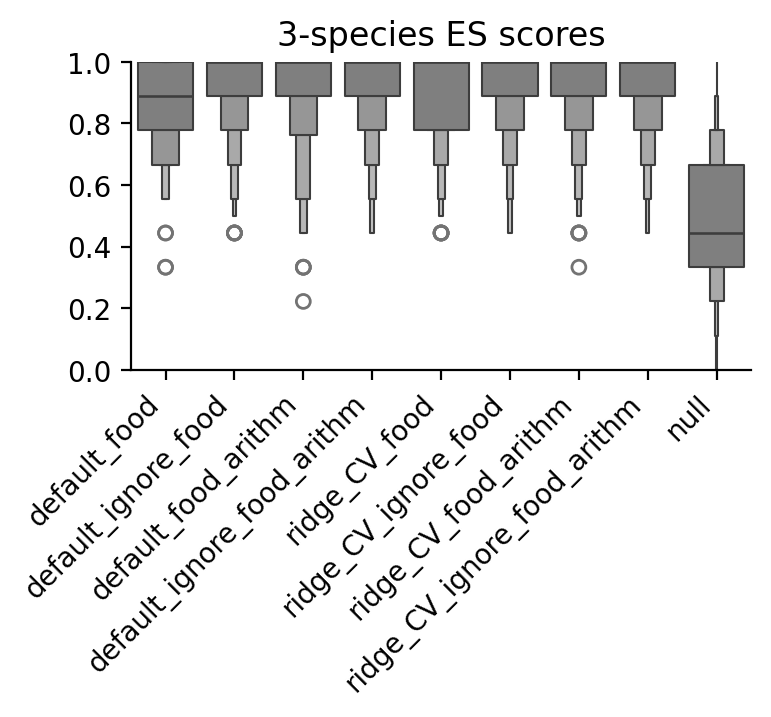

In [163]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_food.loc[meta_food.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

plt.xticks(rotation=45, ha="right")
# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
# plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

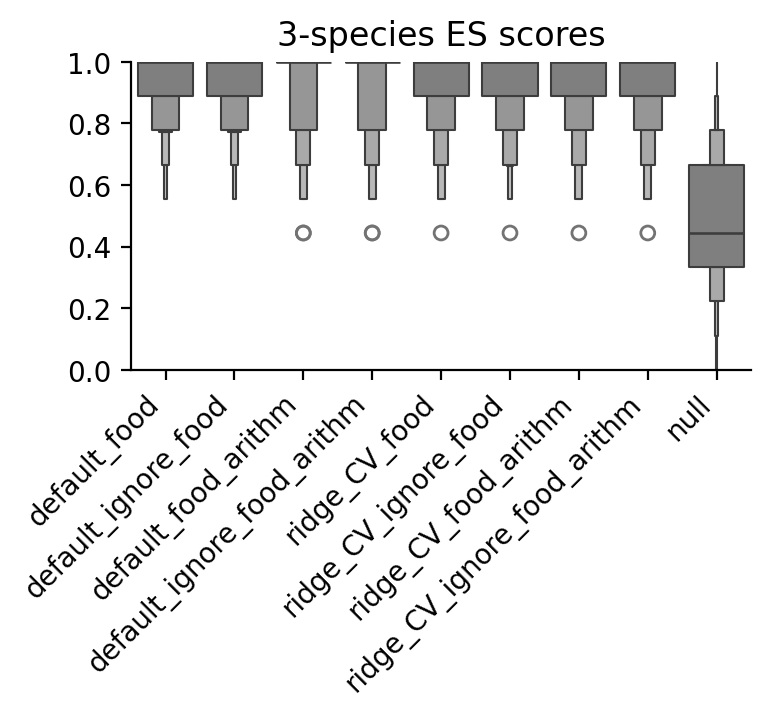

In [164]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_nofood.loc[meta_nofood.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

plt.xticks(rotation=45, ha="right")
# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
# plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

In [165]:
data_food.mean(0)

default_food                   0.878472
default_ignore_food            0.925154
default_food_arithm            0.904321
default_ignore_food_arithm     0.918981
ridge_CV_food                  0.899691
ridge_CV_ignore_food           0.915509
ridge_CV_food_arithm           0.923611
ridge_CV_ignore_food_arithm    0.914738
dtype: float64

In [166]:
data_nofood.mean(0)

default_food                   0.945602
default_ignore_food            0.945602
default_food_arithm            0.943287
default_ignore_food_arithm     0.943673
ridge_CV_food                  0.935185
ridge_CV_ignore_food           0.935571
ridge_CV_food_arithm           0.936343
ridge_CV_ignore_food_arithm    0.937114
dtype: float64

(array([[  0.,   2.,   2.,   0.,  10.,  39.,   0.,  39.,  58., 138.],
        [  0.,   0.,   5.,   0.,   5.,  13.,   0.,  34.,  42., 189.],
        [  1.,   3.,   7.,   0.,  13.,  12.,   0.,  26.,  48., 178.],
        [  0.,   0.,   8.,   0.,   8.,  11.,   0.,  31.,  43., 187.],
        [  0.,   0.,   5.,   0.,   9.,  20.,   0.,  45.,  49., 160.],
        [  0.,   0.,   6.,   0.,   6.,  16.,   0.,  38.,  41., 181.],
        [  0.,   1.,   4.,   0.,   5.,  15.,   0.,  32.,  43., 188.],
        [  0.,   0.,   6.,   0.,   9.,   9.,   0.,  40.,  48., 176.]]),
 array([0.22222222, 0.3       , 0.37777778, 0.45555556, 0.53333333,
        0.61111111, 0.68888889, 0.76666667, 0.84444444, 0.92222222,
        1.        ]),
 <a list of 8 BarContainer objects>)

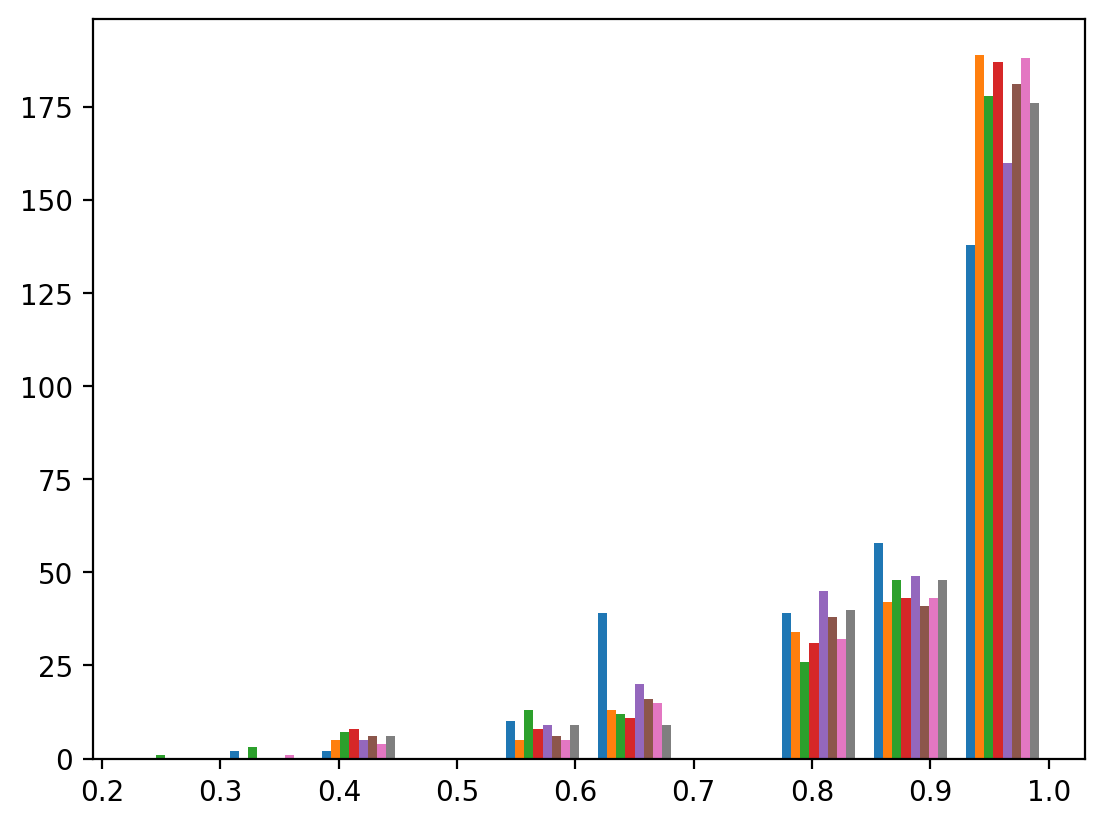

In [167]:
# plt.hist(data_nofood.values)
plt.hist(data_food)
# plt.yscale("log")

(array([[  0.,   0.,   8.,   0.,  10.,   0.,  21.,   0.,  37., 212.],
        [  0.,   0.,   8.,   0.,  10.,   0.,  22.,   0.,  35., 213.],
        [  2.,   0.,   9.,   0.,  10.,   0.,  23.,   0.,  25., 219.],
        [  2.,   0.,   9.,   0.,   9.,   0.,  24.,   0.,  25., 219.],
        [  1.,   0.,   9.,   0.,  11.,   0.,  30.,   0.,  34., 203.],
        [  1.,   0.,   8.,   0.,  11.,   0.,  31.,   0.,  35., 202.],
        [  1.,   0.,  10.,   0.,  12.,   0.,  24.,   0.,  36., 205.],
        [  1.,   0.,  10.,   0.,  12.,   0.,  24.,   0.,  34., 207.]]),
 array([0.44444444, 0.5       , 0.55555556, 0.61111111, 0.66666667,
        0.72222222, 0.77777778, 0.83333333, 0.88888889, 0.94444444,
        1.        ]),
 <a list of 8 BarContainer objects>)

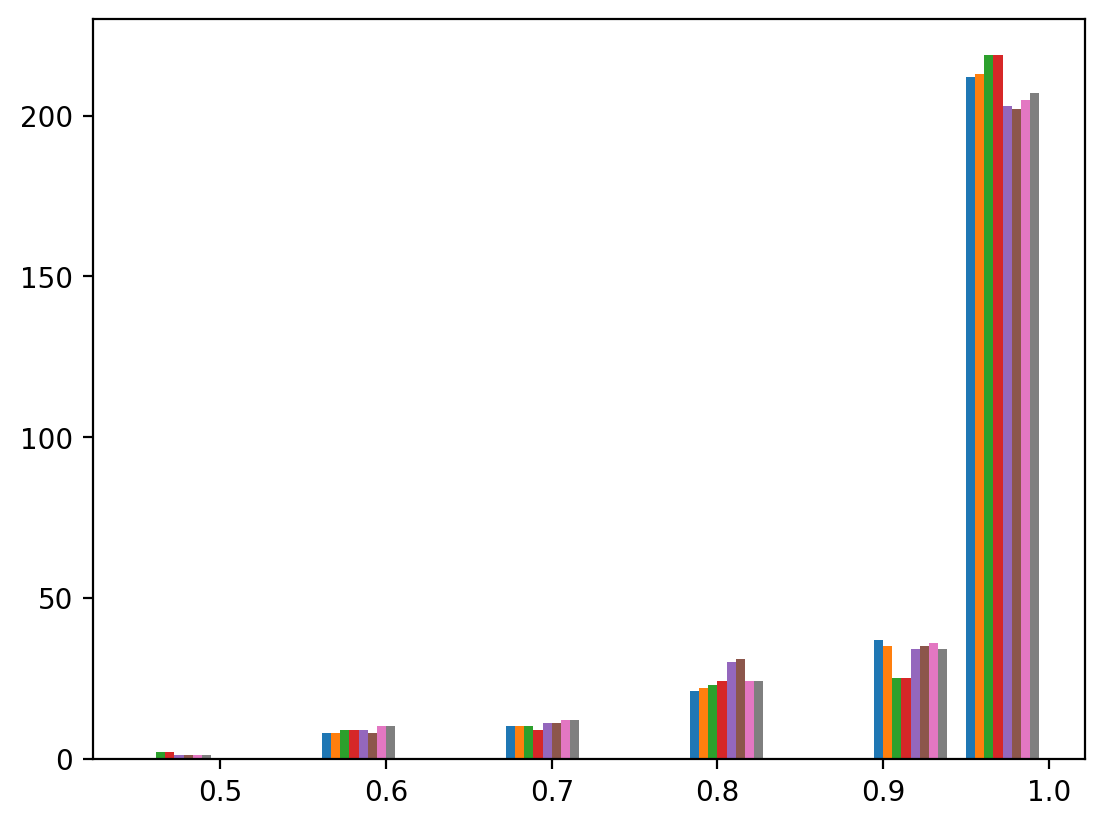

In [168]:
# plt.hist(data_nofood.values)
plt.hist(data_nofood)
# plt.yscale("log")

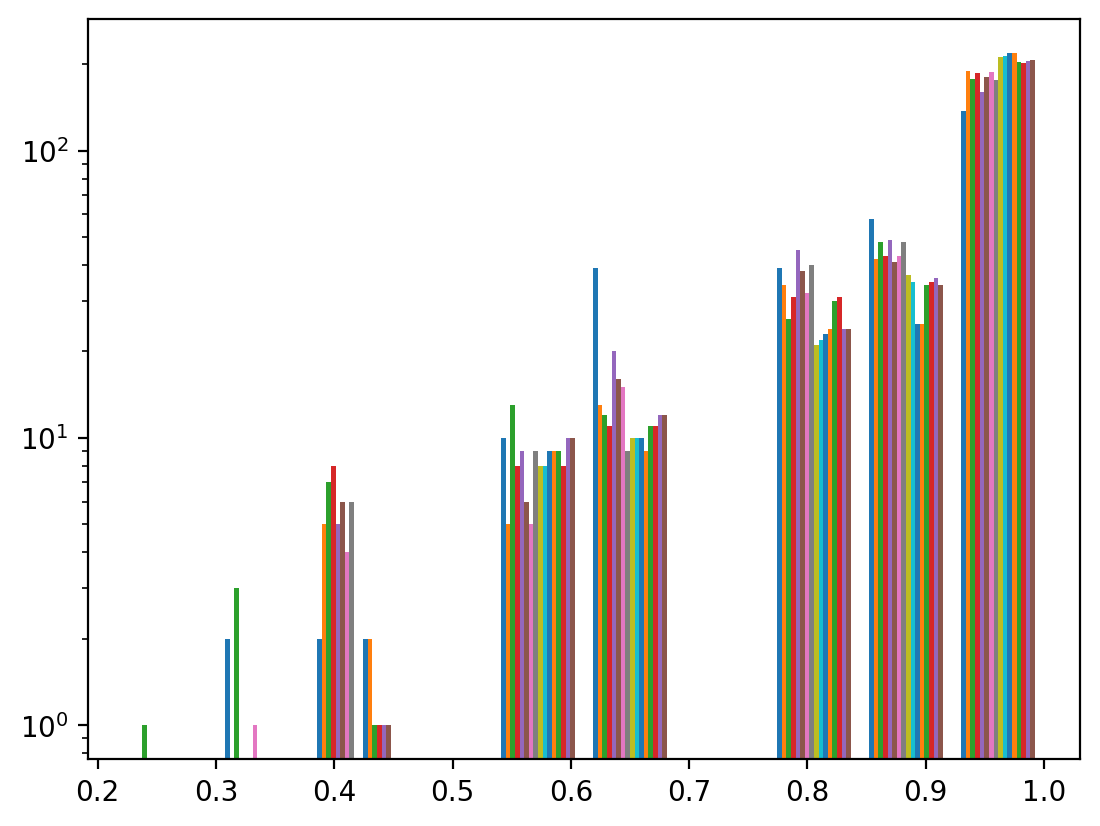

In [169]:
# plt.hist(data_nofood.values)
plt.hist(np.hstack([data_food.loc[meta_food.query("n_species == @n_species").index], 
                    data_nofood.loc[meta_nofood.query("n_species == @n_species").index]]))
plt.yscale("log")